In [6]:
# Import the required packages
import os
import numpy as np
import datetime
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2, ResNet50V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [7]:
# Set directories for ImageDataLoader
base_dir = "/kaggle/input/cifake-real-and-ai-generated-synthetic-images/"
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [8]:
# Use ImageDataGenerator to scale the images for faster training & augment the images for better test accuracy & loss
train_datagen = ImageDataGenerator( rescale = 1.0/255., horizontal_flip=True, vertical_flip=True)
test_datagen = ImageDataGenerator( rescale = 1.0/255., horizontal_flip=True, vertical_flip=True )

In [18]:
# Use the ImageDataGenerator to load images, rescale, and set labels
train_generator = train_datagen.flow_from_directory(train_dir,batch_size=100, class_mode='binary', target_size=(256,256),color_mode="rgb")
test_generator = test_datagen.flow_from_directory(test_dir, batch_size=100, class_mode='binary', target_size=(256,256),color_mode="rgb")

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [20]:
# Define a CNN model using Keras
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),  # 238 x 238 x 32
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),  # 236 x 236 x 32
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),  # 118 x 118 x 32
    layers.Conv2D(64, (3, 3), activation='relu'),  # 116 x 116 x 64
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),  # 114 x 114 x 64
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),  # 57 x 57 x 64
    layers.Conv2D(128, (3, 3), activation='relu'),  # 55 x 55 x 128
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu'),  # 53 x 53 x 128
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),  # 26 x 26 x 128
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Show the model summary
model.summary()

# Compile the model
model.compile(optimizer='Adam',loss= 'binary_crossentropy',metrics=['accuracy'])

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 252, 252, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 252, 252, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 124, 124, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 122, 122, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 122, 122, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 59, 59, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 59, 59, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 57, 57, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 57, 57, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,801,121 (197.61 MB)

 Trainable params: 51,800,225 (197.60 MB)

 Non-trainable params: 896 (3.50 KB)

In [21]:
# Train the model
history = model.fit(train_generator, validation_data = test_generator, epochs = 10)

Epoch 1/10


W0000 00:00:1714062228.329352     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.7860 - loss: 1.7394

W0000 00:00:1714062606.331029     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 467s 455ms/step - accuracy: 0.7861 - loss: 1.7384 - val_accuracy: 0.8727 - val_loss: 0.2916
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 435s 433ms/step - accuracy: 0.9022 - loss: 0.2441 - val_accuracy: 0.9006 - val_loss: 0.2549
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 438s 436ms/step - accuracy: 0.9232 - loss: 0.1963 - val_accuracy: 0.9104 - val_loss: 0.2217
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 422s 420ms/step - accuracy: 0.9316 - loss: 0.1761 - val_accuracy: 0.9111 - val_loss: 0.2201
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 427s 424ms/step - accuracy: 0.9376 - loss: 0.1634 - val_accuracy: 0.9276 - val_loss: 0.1928
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 432s 430ms/step - accuracy: 0.9419 - loss: 0.1491 - val_accuracy: 0.9327 - val_loss: 0.1729
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 446s 433ms/step - accuracy: 0.9469 - loss: 0.1405 - val_accuracy: 0.9341 - val_loss: 0.1806
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 450s 447ms/step - accuracy: 0.9

In [13]:
# Function for plotting the error rate and metrics rate
def plot_metrics(history, metric):
    plt.plot(history.history[metric], label = metric)
    plt.plot(history.history['val_' + metric], label='val_' + metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.show()

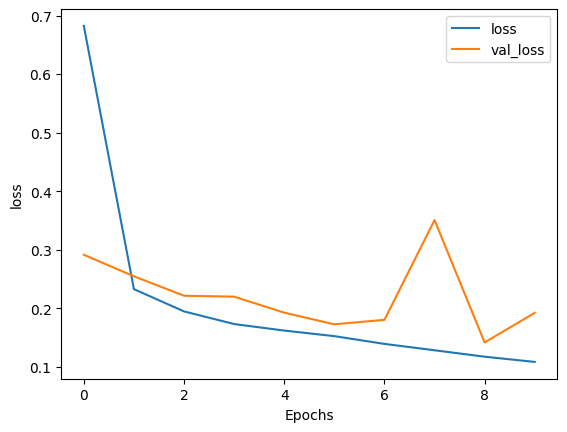

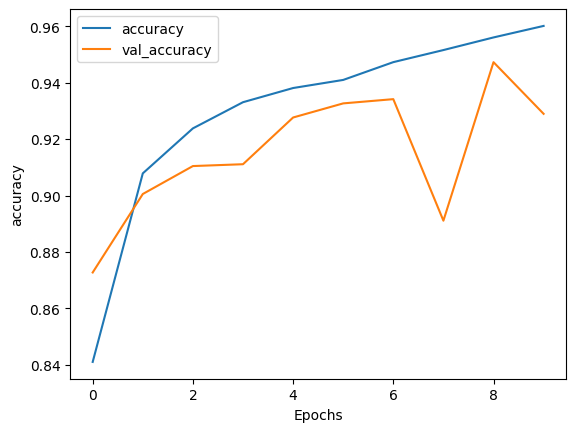

In [23]:
# Plot accuracy and loss per epoch 
plot_metrics(history, 'loss')
plot_metrics(history, 'accuracy')

Fine-Tune a model with Mobilenet and custom top to classify the images

In [9]:
# Imagenet inputs are 224x224 -- must reshape the data to conform
train_generator = train_datagen.flow_from_directory(train_dir,batch_size=100, class_mode='categorical', target_size=(224,224),color_mode="rgb")
test_generator = test_datagen.flow_from_directory(test_dir, batch_size=100, class_mode='categorical', target_size=(224,224),color_mode="rgb")

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [ ]:
# Load pre-trained MobileNet model without top layers
base_model = MobileNetV2(weights='imagenet', include_top=False)

# Create Sequential model
model = Sequential()

# Add MobileNet base model to the Sequential model
model.add(base_model)

# Add GlobalAveragePooling2D layer
model.add(GlobalAveragePooling2D())

# Add Dense layer for classification
model.add(Dense(2, activation='softmax'))

# Freeze the base model layers
base_model.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
mobilenet_history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)


/tmp/ipykernel_34/3222867705.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 290s 276ms/step - accuracy: 0.8317 - loss: 0.3713 - val_accuracy: 0.8824 - val_loss: 0.2783
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 275s 274ms/step - accuracy: 0.8860 - loss: 0.2744 - val_accuracy: 0.8914 - val_loss: 0.2664
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 276s 275ms/step - accuracy: 0.8915 - loss: 0.2650 - val_accuracy: 0.8928 - val_loss: 0.2623
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 278s 277ms/step - accuracy: 0.8921 - loss: 0.2602 - val_accuracy: 0.8949 - val_loss: 0.2557
Epoch 5/10
  60/1000 ━━━━━━━━━━━━━━━━━━━━ 3:38 233ms/step - accuracy: 0.8984 - loss: 0.2492

In [ ]:
# Plot accuracy and loss per epoch 
plot_metrics(mobilenet_history, 'loss')
plot_metrics(mobilenet_history, 'accuracy')

Fine-Tune a model with Resnet50V2 and custom top to classify the images. This is a good pre-trained model for our project because it is light-weight, has good performance, and has a smaller than average number of parameters.If needed we can add more full-connected layers on top of the model. However, a single layer seems to bring very good perfomance. This model is takes up more space and requires more parameters than the mobilenetv2. It will need to show a substantial improvement in performance over the mobilnet model to waarant using it instead because that model it lighter-weight. 

In [11]:
# Load pre-trained MobileNet model without top layers
base_model_resnet = ResNet50V2(weights='imagenet', include_top=False)

# Create Sequential model
model_resnet = Sequential()

# Add MobileNet base model to the Sequential model
model_resnet.add(base_model_resnet)

# Add GlobalAveragePooling2D layer
model_resnet.add(GlobalAveragePooling2D())

# Add Dense layer for classification
model_resnet.add(Dense(2, activation='softmax'))

# Freeze the base model layers
base_model_resnet.trainable = False

# Compile the model
model_resnet.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
resnet_history = model_resnet.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


   1/1000 ━━━━━━━━━━━━━━━━━━━━ 7:04:12 25s/step - accuracy: 0.5100 - loss: 0.9047

I0000 00:00:1714070540.364584     202 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1714070540.410888     202 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 568ms/step - accuracy: 0.8301 - loss: 0.3723

W0000 00:00:1714071113.489844     201 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 730s 705ms/step - accuracy: 0.8302 - loss: 0.3722 - val_accuracy: 0.8985 - val_loss: 0.2481
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 281s 279ms/step - accuracy: 0.8947 - loss: 0.2535 - val_accuracy: 0.9022 - val_loss: 0.2375
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 276s 274ms/step - accuracy: 0.9007 - loss: 0.2396 - val_accuracy: 0.9075 - val_loss: 0.2274
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 277s 275ms/step - accuracy: 0.9042 - loss: 0.2345 - val_accuracy: 0.9020 - val_loss: 0.2368
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 281s 279ms/step - accuracy: 0.9046 - loss: 0.2343 - val_accuracy: 0.9061 - val_loss: 0.2314
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 275s 273ms/step - accuracy: 0.9030 - loss: 0.2392 - val_accuracy: 0.9032 - val_loss: 0.2383
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 274s 273ms/step - accuracy: 0.9058 - loss: 0.2305 - val_accuracy: 0.9079 - val_loss: 0.2285
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 277s 276ms/step - accuracy: 0.9

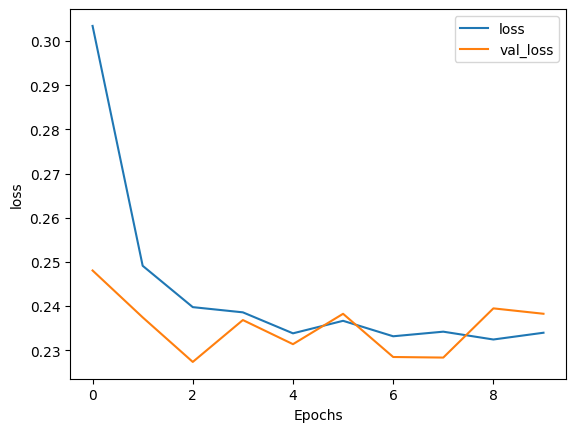

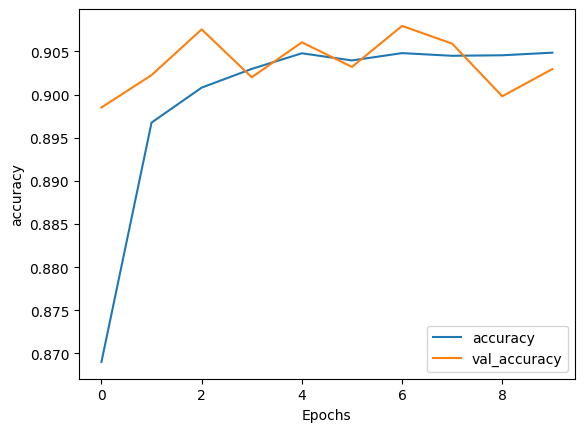

In [15]:
# Plot accuracy and loss per epoch 
plot_metrics(resnet_history, 'loss')
plot_metrics(resnet_history, 'accuracy')

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

img_path = '/kaggle/input/cifake-real-and-ai-generated-synthetic-images/test/FAKE/0 (10).jpg'

img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)

In [ ]:
# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in mobilenet.layers if 'conv1' in layer.name]
activation_model = Model(inputs=mobilenet.input, outputs=layer_outputs)
intermediate_activations = activation_model.predict(img_tensor)

first_layer_activation = intermediate_activations[0]

plt.imshow(first_layer_activation[0, :, :, 19], cmap='viridis')
plt.axis('off')
plt.show()